# Extract latent embeddings and create tsne plots

In [1]:
import numpy as np
from os.path import join
import pandas as pd
from openTSNE import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from implicitmorph import utils, dataio, argument_parser

In [2]:
# Training dataset
id_list_path = '/scratch-emmy/usr/nimpede1/pcs_v7_volume_rotation/splits/train.npy'

experiment_folder = 'voxel_neuron_morph/logs/test'
id_list = np.load(id_list_path, allow_pickle=True)
opt = utils.load_config(experiment_folder)
opt.use_amp=argument_parser.t_or_f(opt.use_amp)
opt.normalization_per_shape = argument_parser.t_or_f(opt.normalization_per_shape)
opt.curriculum_learning = argument_parser.t_or_f(opt.curriculum_learning)
opt.should_early_stop = argument_parser.t_or_f(opt.should_early_stop)

opt.bce_loss = argument_parser.t_or_f(opt.bce_loss)
opt.occ_boundary_loss = argument_parser.t_or_f(opt.occ_boundary_loss)
opt.inter_loss = argument_parser.t_or_f(opt.inter_loss)
opt.normals_loss = argument_parser.t_or_f(opt.normals_loss)
opt.grad_loss = argument_parser.t_or_f(opt.grad_loss)
opt.l1_loss = argument_parser.t_or_f(opt.l1_loss)
opt.latent_kld_loss = argument_parser.t_or_f(opt.latent_kld_loss)
opt.latent_kld_prior_loss = argument_parser.t_or_f(opt.latent_kld_prior_loss)
opt.latent_norm_loss = argument_parser.t_or_f(opt.latent_norm_loss)

opt.n_shapes = int(opt.n_shapes)
opt.num_epochs = int(opt.num_epochs)
opt.lr = float(opt.lr)
opt.num_hidden_layers = int(opt.num_hidden_layers)
opt.hidden_features = int(opt.hidden_features)
opt.shape_dim = int(opt.shape_dim)
opt.on_surface_points = int(opt.on_surface_points)
opt.resolution = int(opt.resolution)

dataset_train = dataio.MicronsMinnie(pointcloud_path=opt.pointcloud_path,
                                      all_segment_splits=id_list,
                                      n_shapes=41476,
                                      on_surface_points=int(opt.on_surface_points),
                                      uniform_points=int(opt.uniform_points),
                                      bb_points=int(opt.bb_points),
                                      perturbed_points=int(opt.perturbed_points),
                                      normalization_per_shape=opt.normalization_per_shape,
                                      centering=opt.centering,
                                      rank=0)

on surface: 5000 uniform: 2000 bb: 2000 perturbed: 1000 total: 10000 encoder: 100000


0 [    0     1     2 ... 41473 41474 41475]


In [3]:
# Path to the point clouds of the neurons
pointcloud_path = '/scratch-emmy/usr/nimpede1/pcs_v7_volume_rotation'
id_list = 'splits'
mode = 'train'

# Path to the saved embeddings
path = '/home/nimlucmo/voxel_neuron_morph/embeddings'

In [4]:
# source: https://github.com/marissaweis/cluster_neuron/blob/main/neuron_cluster/visualize.py
def plot_tsne(df, name, grey_class=False, colors=None, savepath=None):
    ''' Plot tSNE embedding colored according to <name>.

        Args:
            df: pandas DataFrame with columns `tsne_latent_emb_x`,
                `tsne_latent_emb_y` and `<name>`.
            name: column name refering to column containing the labels
                for coloring (str).
            grey_class: If set to `True`, colors last label class in
                grey (only possible if colors were supplied).
            colors: List of colors to build palette from.
            savepath: If set, figure is saved under this path and
                closed.
    '''
    import seaborn as sns

    unique_labels = sorted(df[name].dropna().unique())
    n = len(unique_labels)

    if colors:
        if grey_class:
            palette = sns.color_palette(colors[:n-1] + ['#C0C0C0'], n_colors=n)
        else:
            palette = sns.color_palette(colors, n_colors=n)
    else:
        palette = 'Paired'

    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    sns.scatterplot(
            data=df,
            x='tsne_x',
            y='tsne_y',
            hue=name,
            hue_order=unique_labels,
            ax=ax,
            palette=palette,
            alpha=0.75,
            linewidth=0,
            legend='full',
            s=20,
        )

    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title("Assigned Layer", fontsize=18)
    # ax.set_title(name)
    plt.legend(bbox_to_anchor=(1,1), fontsize=18)
    plt.tight_layout()

    if savepath is not None:
        ax.set_title('')
        fig.savefig(savepath, bbox_inches='tight')
        plt.close(fig)


## Labeled Data

In [5]:
label_df = pd.read_pickle(join(pointcloud_path, 'graphdino_assigned_layer.pkl'))

In [6]:
label_df.head()

,segment_id,split_index,assigned_layer,soma_x,soma_y,soma_z,assigned_layer_num,segment_split
0,864691135809506508,0,L6,786.853079,-966.978788,978.984702,3,864691135809506508_0
1,864691136906798958,0,L4,918.602958,-720.669160,689.470267,1,864691136906798958_0
2,864691135946684769,0,L5,764.721793,-793.125344,780.922957,2,864691135946684769_0
3,864691135478263750,0,L6,915.639978,-943.565034,726.730846,3,864691135478263750_0
4,864691135432723442,0,L5,631.949298,-799.105147,679.803098,2,864691135432723442_0


In [7]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32571 entries, 0 to 32570
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   segment_id          32571 non-null  int64  
 1   split_index         32571 non-null  int64  
 2   assigned_layer      32571 non-null  object 
 3   soma_x              32571 non-null  float64
 4   soma_y              32571 non-null  float64
 5   soma_z              32571 non-null  float64
 6   assigned_layer_num  32571 non-null  int64  
 7   segment_split       32571 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 2.2+ MB


## t_SNE

### MorphVoxel Dense64

In [8]:
# latent_df = pd.DataFrame(data={'latent_emb':list(latent_embeddings),'segment_split': id_list})
latent_df = pd.read_pickle(join(path, 'df_latent_label_64dense.pkl'))

In [9]:
latent_df.head()

,latent_emb,segment_split,segment_id,split_index,assigned_layer,soma_x,soma_y,soma_z,assigned_layer_num
0,"[1.3706075, 1.3000162, 1.3278333, 1.3399966, 1...",864691135581551213_0,864691135581551213,0,L5,575.167005,-847.861519,970.238874,2
1,"[1.3750811, 1.2947053, 1.2998505, 1.3029716, 1...",864691135291725238_0,864691135291725238,0,L5,426.844885,-833.658523,793.094957,2
2,"[1.3713616, 1.287458, 1.3121383, 1.319637, 1.3...",864691134988820346_0,864691134988820346,0,L6,975.419782,-1006.491090,849.576036,3
3,"[1.3824496, 1.2951459, 1.3113408, 1.3225497, 1...",864691135012879766_0,864691135012879766,0,L4,507.544420,-671.833514,757.933138,1
4,"[1.3855166, 1.291333, 1.3054343, 1.3387328, 1....",864691136815158894_0,864691136815158894,0,L23,711.021644,-586.199703,767.787353,0


In [10]:
latent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24278 entries, 0 to 24277
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latent_emb          24278 non-null  object 
 1   segment_split       24278 non-null  object 
 2   segment_id          24278 non-null  int64  
 3   split_index         24278 non-null  int64  
 4   assigned_layer      24278 non-null  object 
 5   soma_x              24278 non-null  float64
 6   soma_y              24278 non-null  float64
 7   soma_z              24278 non-null  float64
 8   assigned_layer_num  24278 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.7+ MB


In [11]:
latents = np.stack(latent_df['latent_emb'].values).astype(float)
colors = np.stack(latent_df['assigned_layer_num'].values)
labels = np.stack(latent_df['assigned_layer'].values)

In [12]:
tsne = TSNE(
    perplexity=300,
    metric='euclidean',
    n_jobs=8,
    random_state=42,
    verbose=False,
)

tsne_emb = tsne.fit(latents)

In [13]:
tsnes = np.array(list(tsne_emb))
tsne_x, tsne_y = tsnes[:,0], tsnes[:,1]
latent_df['tsne_x'] = tsne_x
latent_df['tsne_y'] = tsne_y

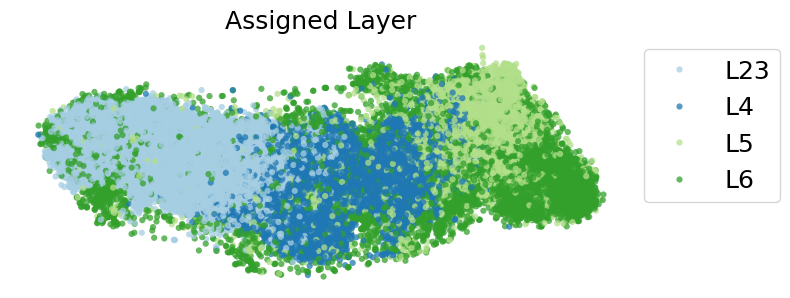

In [14]:
plot_tsne(latent_df, 'assigned_layer', grey_class=False, colors=None)

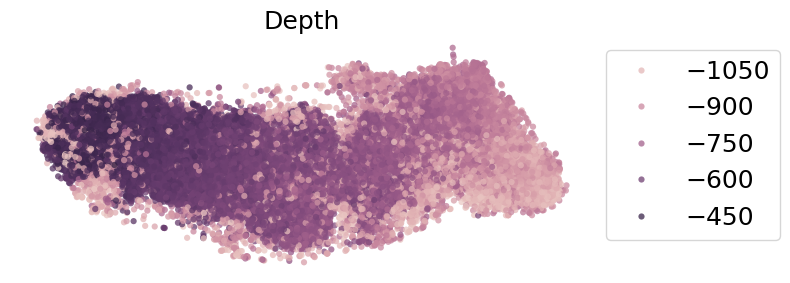

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.scatterplot(
            data=latent_df,
            x='tsne_x',
            y='tsne_y',
            hue='soma_y',
            alpha=0.75,
            linewidth=0,
            legend='auto',
            s=20,
        )

ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Depth', fontsize=18)
plt.legend(bbox_to_anchor=(1,1), fontsize=18)
plt.tight_layout()

### MorphVoxel nLat64

In [16]:
# latent_df = pd.DataFrame(data={'latent_emb':list(latent_embeddings),'segment_split': id_list})
latent_df = pd.read_pickle(join(path, 'df_latent_label_64nLat.pkl'))

In [17]:
latent_df.head()

,latent_emb,segment_split,segment_id,split_index,assigned_layer,soma_x,soma_y,soma_z,assigned_layer_num
0,"[6.373562, 6.177162, 5.996539, 5.9264784, 5.83...",864691135581551213_0,864691135581551213,0,L5,575.167005,-847.861519,970.238874,2
1,"[6.3790884, 6.1756077, 5.970216, 5.875817, 5.7...",864691135291725238_0,864691135291725238,0,L5,426.844885,-833.658523,793.094957,2
2,"[6.3750744, 6.1749496, 5.9909124, 5.908015, 5....",864691134988820346_0,864691134988820346,0,L6,975.419782,-1006.491090,849.576036,3
3,"[6.378192, 6.1831613, 6.017871, 5.9562364, 5.8...",864691135012879766_0,864691135012879766,0,L4,507.544420,-671.833514,757.933138,1
4,"[6.3833723, 6.19304, 6.029415, 5.9844546, 5.91...",864691136815158894_0,864691136815158894,0,L23,711.021644,-586.199703,767.787353,0


In [18]:
latent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24278 entries, 0 to 24277
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latent_emb          24278 non-null  object 
 1   segment_split       24278 non-null  object 
 2   segment_id          24278 non-null  int64  
 3   split_index         24278 non-null  int64  
 4   assigned_layer      24278 non-null  object 
 5   soma_x              24278 non-null  float64
 6   soma_y              24278 non-null  float64
 7   soma_z              24278 non-null  float64
 8   assigned_layer_num  24278 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.7+ MB


In [19]:
latents = np.stack(latent_df['latent_emb'].values).astype(float)
colors = np.stack(latent_df['assigned_layer_num'].values)
labels = np.stack(latent_df['assigned_layer'].values)

In [20]:
tsne = TSNE(
    perplexity=300,
    metric='euclidean',
    n_jobs=8,
    random_state=42,
    verbose=False,
)

tsne_emb = tsne.fit(latents)

In [21]:
tsnes = np.array(list(tsne_emb))
tsne_x, tsne_y = tsnes[:,0], tsnes[:,1]
latent_df['tsne_x'] = tsne_x
latent_df['tsne_y'] = tsne_y

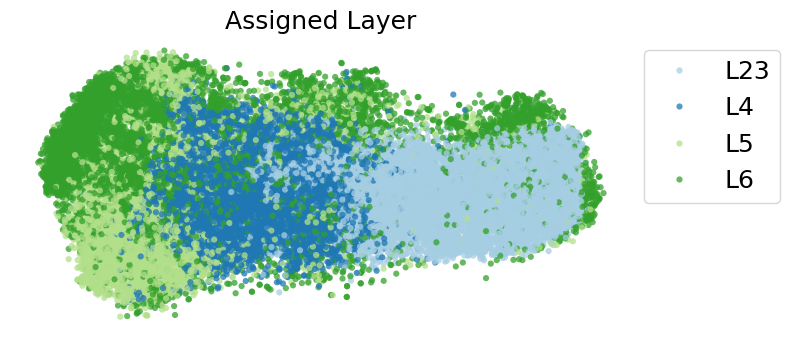

In [22]:
plot_tsne(latent_df, 'assigned_layer', grey_class=False, colors=None)

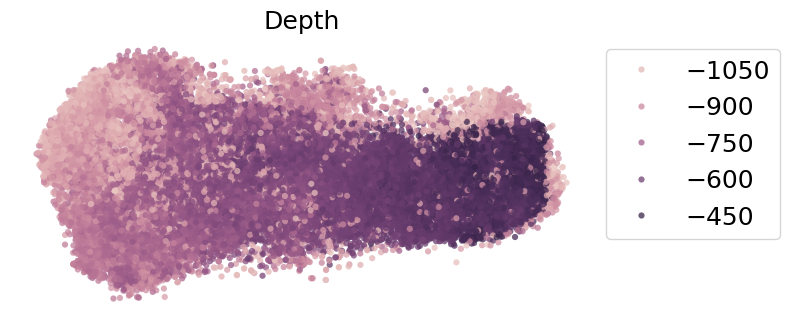

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.scatterplot(
            data=latent_df,
            x='tsne_x',
            y='tsne_y',
            hue='soma_y',
            alpha=0.75,
            linewidth=0,
            legend='auto',
            s=20,
        )

ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Depth', fontsize=18)
plt.legend(bbox_to_anchor=(1,1), fontsize=18)
plt.tight_layout()

### MorphVoxel Dense128

In [24]:
# latent_df = pd.DataFrame(data={'latent_emb':list(latent_embeddings),'segment_split': id_list})
latent_df = pd.read_pickle(join(path, 'df_latent_label_128dense.pkl'))

In [25]:
latent_df.head()

,latent_emb,segment_split,segment_id,split_index,assigned_layer,soma_x,soma_y,soma_z,assigned_layer_num
0,"[5.0861087, 4.571979, 4.543047, 4.558725, 4.47...",864691135581551213_0,864691135581551213,0,L5,575.167005,-847.861519,970.238874,2
1,"[5.0861087, 4.55764, 4.557181, 4.6326647, 4.58...",864691135291725238_0,864691135291725238,0,L5,426.844885,-833.658523,793.094957,2
2,"[5.0861087, 4.5727587, 4.546654, 4.5740824, 4....",864691134988820346_0,864691134988820346,0,L6,975.419782,-1006.491090,849.576036,3
3,"[5.0861087, 4.539078, 4.4770036, 4.5000973, 4....",864691135012879766_0,864691135012879766,0,L4,507.544420,-671.833514,757.933138,1
4,"[5.0861087, 4.530386, 4.4572763, 4.4584203, 4....",864691136815158894_0,864691136815158894,0,L23,711.021644,-586.199703,767.787353,0


In [26]:
latent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24278 entries, 0 to 24277
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latent_emb          24278 non-null  object 
 1   segment_split       24278 non-null  object 
 2   segment_id          24278 non-null  int64  
 3   split_index         24278 non-null  int64  
 4   assigned_layer      24278 non-null  object 
 5   soma_x              24278 non-null  float64
 6   soma_y              24278 non-null  float64
 7   soma_z              24278 non-null  float64
 8   assigned_layer_num  24278 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.7+ MB


In [27]:
latents = np.stack(latent_df['latent_emb'].values).astype(float)
colors = np.stack(latent_df['assigned_layer_num'].values)
labels = np.stack(latent_df['assigned_layer'].values)

In [28]:
tsne = TSNE(
    perplexity=300,
    metric='euclidean',
    n_jobs=8,
    random_state=42,
    verbose=False,
)

tsne_emb = tsne.fit(latents)

In [29]:
tsnes = np.array(list(tsne_emb))
tsne_x, tsne_y = tsnes[:,0], tsnes[:,1]
latent_df['tsne_x'] = tsne_x
latent_df['tsne_y'] = tsne_y

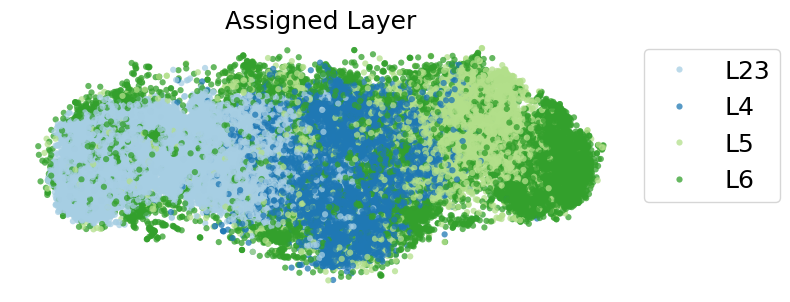

In [30]:
plot_tsne(latent_df, 'assigned_layer', grey_class=False, colors=None)

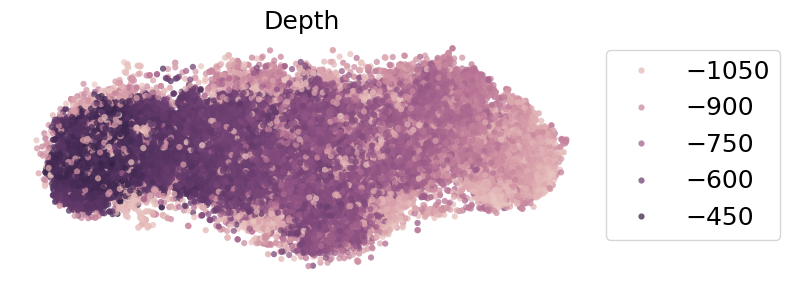

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.scatterplot(
            data=latent_df,
            x='tsne_x',
            y='tsne_y',
            hue='soma_y',
            alpha=0.75,
            linewidth=0,
            legend='auto',
            s=20,
        )

ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Depth', fontsize=18)
plt.legend(bbox_to_anchor=(1,1), fontsize=18)
plt.tight_layout()

### MorphVoxel nLat128

In [32]:
# latent_df = pd.DataFrame(data={'latent_emb':list(latent_embeddings),'segment_split': id_list})
latent_df = pd.read_pickle(join(path, 'df_latent_label_128nLat.pkl'))

In [33]:
latent_df.head()

,latent_emb,segment_split,segment_id,split_index,assigned_layer,soma_x,soma_y,soma_z,assigned_layer_num
0,"[12.599748, 10.741495, 10.5587, 10.5587, 10.55...",864691135581551213_0,864691135581551213,0,L5,575.167005,-847.861519,970.238874,2
1,"[12.599748, 10.770478, 10.5587, 10.5587, 10.73...",864691135291725238_0,864691135291725238,0,L5,426.844885,-833.658523,793.094957,2
2,"[12.599748, 10.737238, 10.5587, 10.5587, 10.60...",864691134988820346_0,864691134988820346,0,L6,975.419782,-1006.491090,849.576036,3
3,"[12.599748, 10.88106, 10.5587, 10.5587, 10.558...",864691135012879766_0,864691135012879766,0,L4,507.544420,-671.833514,757.933138,1
4,"[12.599748, 10.903899, 10.5587, 10.5587, 10.55...",864691136815158894_0,864691136815158894,0,L23,711.021644,-586.199703,767.787353,0


In [34]:
latent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24278 entries, 0 to 24277
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latent_emb          24278 non-null  object 
 1   segment_split       24278 non-null  object 
 2   segment_id          24278 non-null  int64  
 3   split_index         24278 non-null  int64  
 4   assigned_layer      24278 non-null  object 
 5   soma_x              24278 non-null  float64
 6   soma_y              24278 non-null  float64
 7   soma_z              24278 non-null  float64
 8   assigned_layer_num  24278 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.7+ MB


In [35]:
latents = np.stack(latent_df['latent_emb'].values).astype(float)
colors = np.stack(latent_df['assigned_layer_num'].values)
labels = np.stack(latent_df['assigned_layer'].values)

In [36]:
tsne = TSNE(
    perplexity=300,
    metric='euclidean',
    n_jobs=8,
    random_state=42,
    verbose=False,
)

tsne_emb = tsne.fit(latents)

In [37]:
tsnes = np.array(list(tsne_emb))
tsne_x, tsne_y = tsnes[:,0], tsnes[:,1]
latent_df['tsne_x'] = tsne_x
latent_df['tsne_y'] = tsne_y

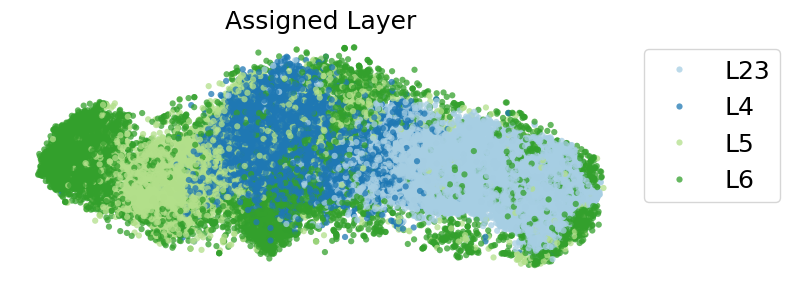

In [38]:
plot_tsne(latent_df, 'assigned_layer', grey_class=False, colors=None)

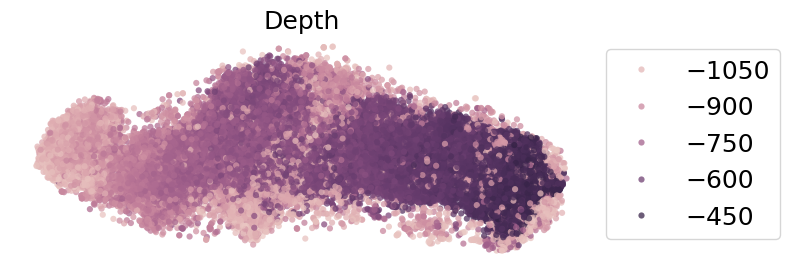

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.scatterplot(
            data=latent_df,
            x='tsne_x',
            y='tsne_y',
            hue='soma_y',
            alpha=0.75,
            linewidth=0,
            legend='auto',
            s=20,
        )

ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Depth', fontsize=18)
plt.legend(bbox_to_anchor=(1,1), fontsize=18)
plt.tight_layout()